In [1]:
##IMPORTING LIBRARIES
import pandas as pd
import statistics as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix


import warnings
warnings.filterwarnings('ignore')

# Import statistics packages from SciPy
from scipy import stats
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm
from scipy.stats import shapiro
from scipy.stats import pearsonr
import math

from matplotlib.gridspec import GridSpec
import matplotlib.ticker as ticker

In [2]:
df_f = pd.read_csv("final.csv")
df_f.head()

,Year,Region,Estimated Population nr,Nr of Persons with Internet Access,% of Persons with Internet Access
0,2011,Border,784000.0,517440.0,66.0
1,2011,Dublin,2523000.0,2119320.0,84.0
2,2011,Ireland,9149700.0,7136766.0,78.0
3,2011,Mid-East,1314900.0,1143963.0,87.0
4,2011,Mid-West,933600.0,718872.0,77.0


In [3]:
df_f.describe()

,Year,Estimated Population nr,Nr of Persons with Internet Access,% of Persons with Internet Access
count,108.000000,1.080000e+02,1.080000e+02,108.000000
mean,2016.500000,2.140712e+06,1.866451e+06,86.027778
std,3.468146,2.729605e+06,2.400130e+06,5.897819
min,2011.000000,5.676000e+05,4.248340e+05,66.000000
25%,2013.750000,8.333750e+05,6.981822e+05,82.000000
50%,2016.500000,9.668000e+05,8.586830e+05,87.000000
75%,2019.250000,1.488175e+06,1.387739e+06,90.062500
max,2022.000000,1.036790e+07,9.745826e+06,97.000000


In [4]:
unique_region_names = set(df_pr['Region'])
years_to_predict = [2025, 2028, 2033]
unique_region_names

array(['Border', 'Dublin', 'Ireland', 'Mid-East', 'Mid-West', 'Midlands',
       'South-East', 'South-West', 'West'], dtype=object)

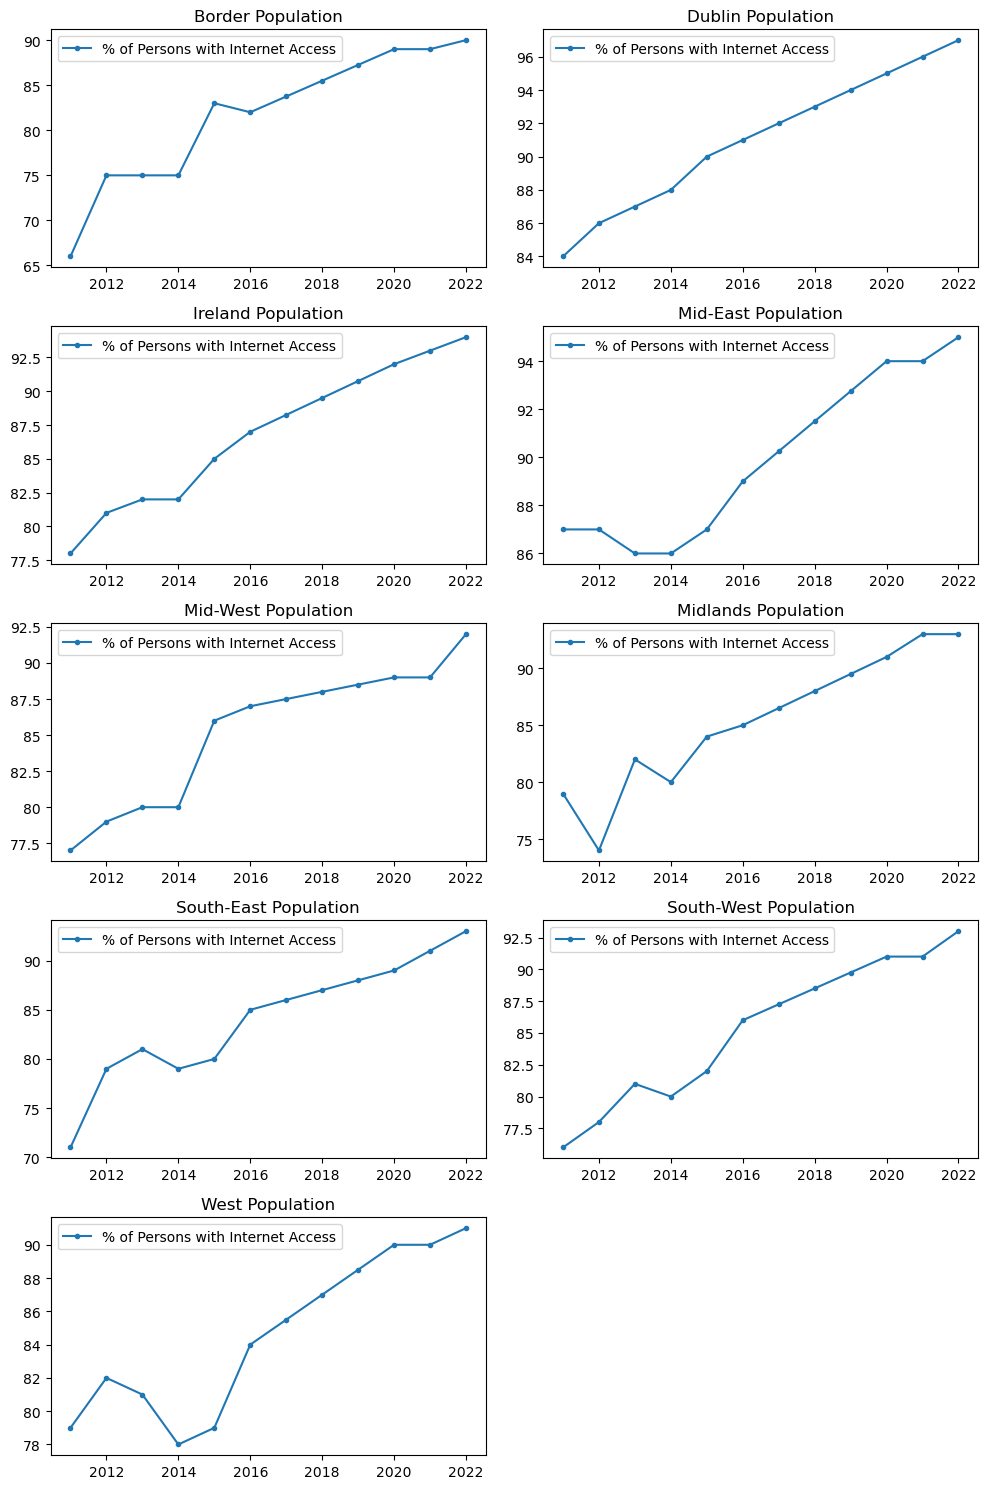

In [6]:
# Create a 2-column grid layout
gs = GridSpec(nrows=5, ncols=2)

# Create a figure
fig = plt.figure(figsize=(10, 15))

# Add subplots to the figure using the grid layout
axs = []
for i, region in enumerate(df_f['Region'].unique()):
    ax = fig.add_subplot(gs[i])
    axs.append(ax)

# Plot the graphs for each region
for i, region in enumerate(df_f['Region'].unique()):
    ax = axs[i]

    # Get the subset of the data frame for the current region
    df_region = df_f[df_f['Region'] == region]

    # Plot the graph for the current region
    ax.plot(df_region['Year'], df_region['% of Persons with Internet Access'],'.-', label='% of Persons with Internet Access')   
    ax.set_title(f'{region} Population')
    ax.legend(loc='upper left')

    # Set the Y axis scale to have readable format for numbers
    formatter = ticker.EngFormatter()
    ax.yaxis.set_major_formatter(formatter)
    
# Adjust the layout of the figure
fig.tight_layout()

# Show the plot
plt.show()

Poisson distribution is a statistical distribution that can be used to model the number of events that occur in a fixed interval of time or space. In this case, we are using the Poisson distribution to model the number of people who adopt the internet in a region in a given year.

The formula works as follows:

The first part of the formula, 1 -, calculates the probability that the number of people who adopt the internet in the region is greater than or equal to the average adoption rate.
The second part of the formula, math.exp(-0.05 * average_adoption_rate), calculates the probability that the number of people who adopt the internet in the region is less than the average adoption rate.
The math.exp() function is the exponential function, which is the inverse of the natural logarithm function.

In [177]:
unique_region_names = set(df_f['Region'])
years_to_predict = [2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033]
unique_region_names

{'Border',
 'Dublin',
 'Ireland',
 'Mid-East',
 'Mid-West',
 'Midlands',
 'South-East',
 'South-West',
 'West'}

In [236]:
def p_steady_increase (avg_in_year,year):
    coef = year - last_year
    l = avg_in_year*coef
    steady_increase = round((poisson.pmf(l, l)*100),3)
    return steady_increase

def p_sudden_spike (avg_in_year,year):
    coef = year - last_year
    l = avg_in_year*coef
    sudden_spike = round((poisson.sf(l, l)*100),3)
    return sudden_spike

def p_of_decline (avg_in_year,year):
    coef = year - last_year
    l = avg_in_year*coef
    decline = round((poisson.cdf(l, l)*100),3)
    return decline

In [237]:
data=[]                            
for region in unique_region_names:
    df = df_f.drop(df_f[(df_f["Region"] != region) ].index)
    avg_in_year = round((df['Nr of Persons with Internet Access'].iloc[-1] - 
                     df['Nr of Persons with Internet Access'].iloc[0])/len(df['Nr of Persons with Internet Access']))
    for year in years_to_predict:
        si = p_steady_increase (avg_in_year,year)
        ss = p_sudden_spike (avg_in_year,year)
        pod = p_of_decline (avg_in_year,year)
        row = [year, region, si, ss , pod]
        data.append(row)

In [238]:
Poisson_prob = pd.DataFrame(data, columns=['Year', 'Region','Probability of Steady Increase',
                                           'Probability of Sudden Spike','Probability of Decline'])
Poisson_prob.head()

,Year,Region,Probability of Steady Increase,Probability of Sudden Spike,Probability of Decline
0,2023,Ireland,0.086,49.943,50.057
1,2024,Ireland,0.060,49.960,50.040
2,2025,Ireland,0.049,49.967,50.033
3,2026,Ireland,0.043,49.971,50.029
4,2027,Ireland,0.038,49.974,50.026


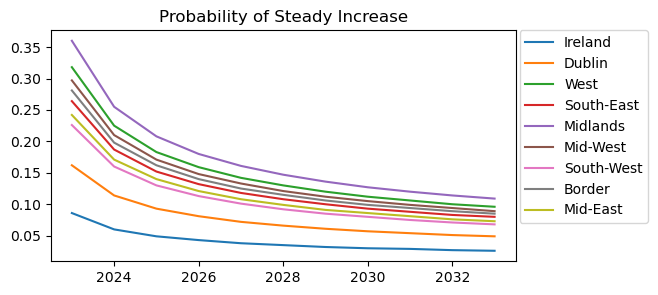

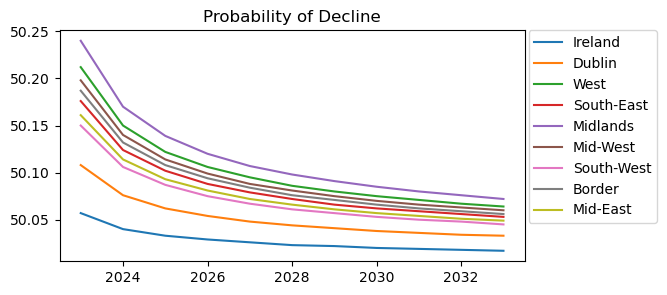

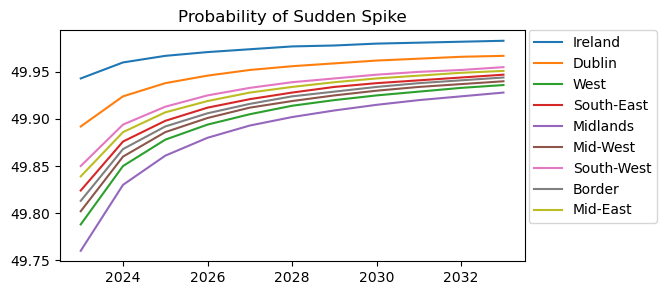

In [252]:
plt.figure(figsize=(6, 3))
for region in unique_region_names:
    df_region = Poisson_prob[Poisson_prob['Region'] == region]
    plt.plot(df_region['Year'], df_region['Probability of Steady Increase'], label=region)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.03))
    plt.title('Probability of Steady Increase')
    
plt.figure(figsize=(6, 3))
for region in unique_region_names:
    df_region = Poisson_prob[Poisson_prob['Region'] == region]
    plt.plot(df_region['Year'], df_region['Probability of Decline'], label=region)
    plt.title('Probability of Decline')
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.03))
    
plt.figure(figsize=(6, 3))
for region in unique_region_names:
    df_region = Poisson_prob[Poisson_prob['Region'] == region]
    plt.plot(df_region['Year'], df_region['Probability of Sudden Spike'], label=region)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.03))
    plt.title('Probability of Sudden Spike')